## wap - Descent area (wap500 > 0)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/phd/functions'.format(home))
from myFuncs import *

### one dataset

In [3]:
variable = 'wap'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

models_cmip6 = [     
    # 'TaiESM1',        # 1
    # 'BCC-CSM2-MR',    # 2
    # 'FGOALS-g3',      # 3
    # 'CNRM-CM6-1',     # 4
    # 'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    # 'NorESM2-MM',     # 7
    # 'GFDL-CM4',       # 8
    # 'CanESM5',        # 9
    # 'CMCC-ESM2',      # 10
    # 'UKESM1-0-LL',    # 11
    # 'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    # 'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'abrupt-4xCO2'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:wap, dataset:MPI-ESM1-2-HR, experiment:historical, resolution:orig


<xarray.Dataset>
Dimensions:  (time: 10957, plev: 8, lat: 74, lon: 384)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -34.13 -33.19 -32.26 -31.32 ... 32.26 33.19 34.13
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Data variables:
    wap      (time, plev, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            wap
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/493e10a2-6a12-41af-8223-4206f4ee34c3

In [4]:
data = ds[variable]
data

<xarray.DataArray 'wap' (time: 10957, plev: 8, lat: 74, lon: 384)>
[2490832896 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -34.13 -33.19 -32.26 -31.32 ... 32.26 33.19 34.13
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    hPa day⁻¹

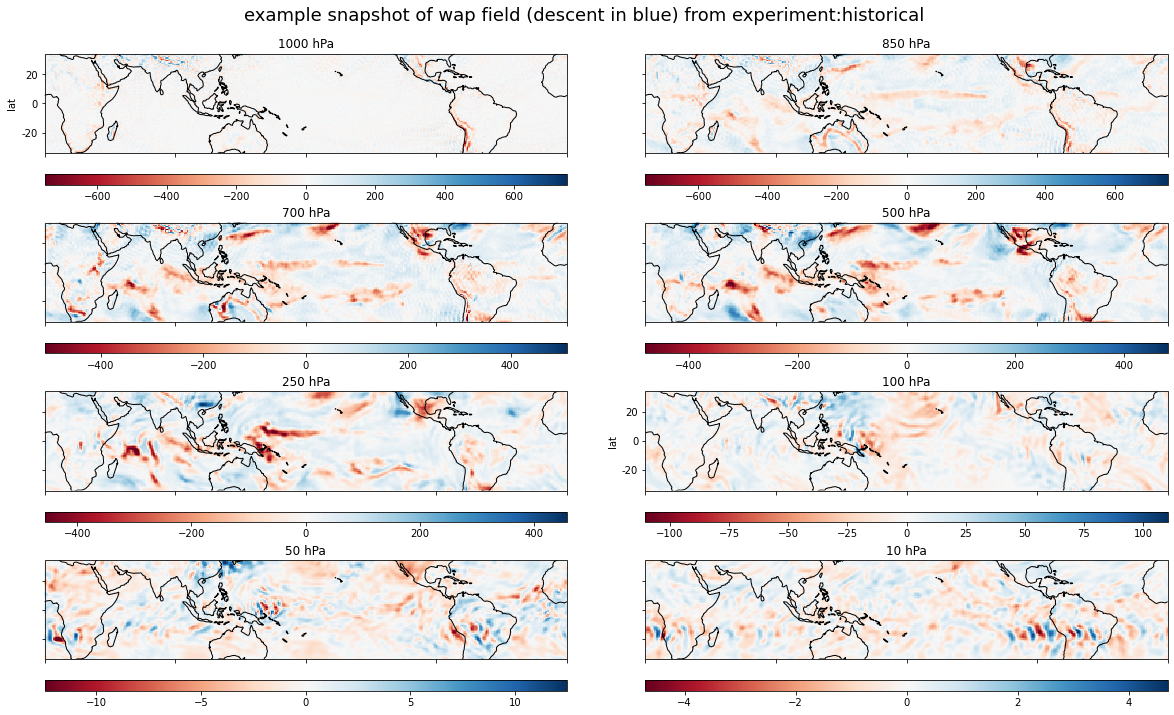

In [5]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field (descent in blue) from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)
for i, plev in enumerate(data['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = data.isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='RdBu', vmin=-vmax, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)

    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

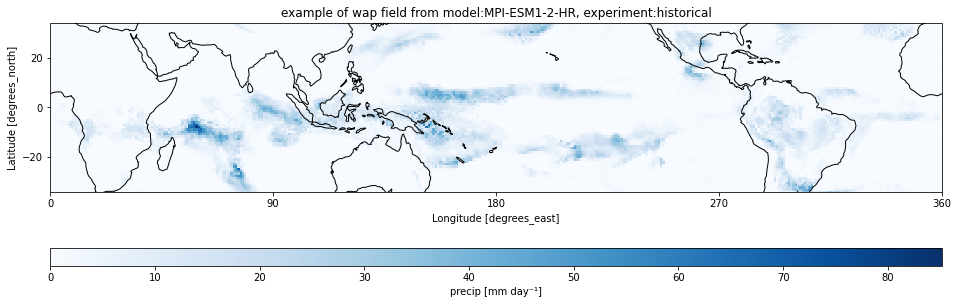

In [6]:
scene = get_dsvariable('precip', datasets[0], experiments[0], resolution=resolutions[0])['precip'].isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

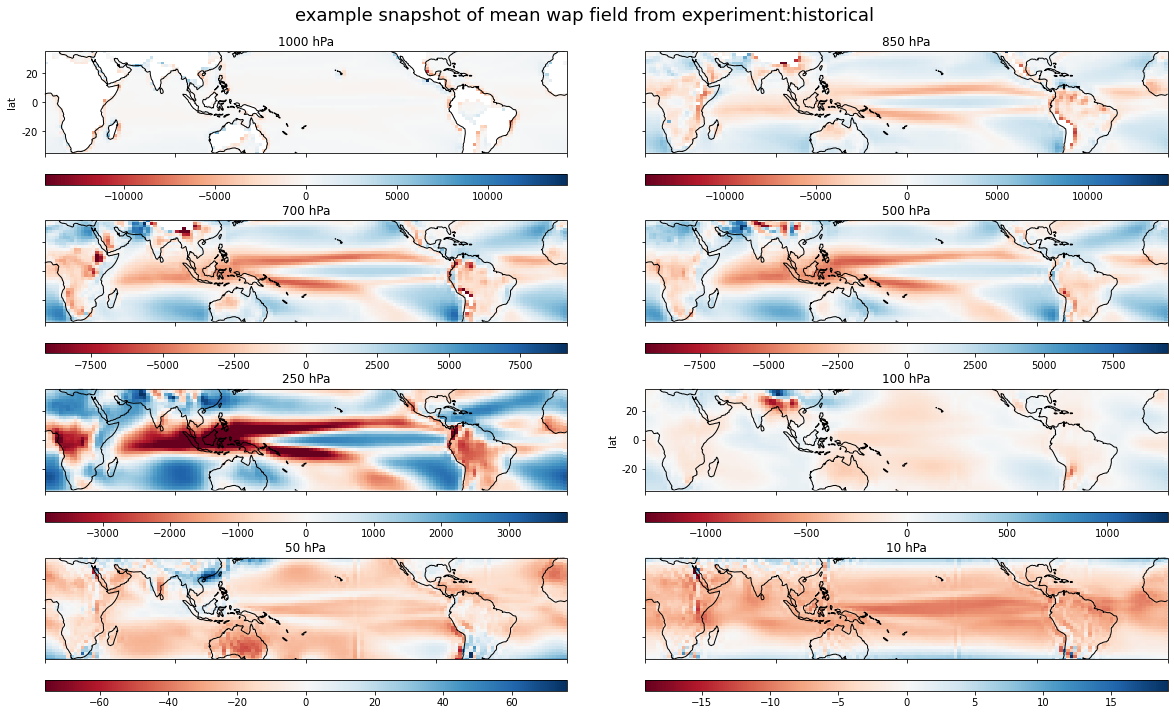

In [7]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of mean {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)
for i, plev in enumerate(data['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = data.mean(dim = 'time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    vmax = scene.sel(plev=plev).max()
    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='RdBu', vmin=-vmax, vmax=vmax)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        
    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

In [14]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
wap_descent = data.where(data>0)
wap_descent.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean of wap in descending regions for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('wap [{}]'.format('hPa/day'))
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((data.plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

In [7]:
data['plev']

<xarray.DataArray 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
Attributes:
    units:          Pa
    axis:           Z
    positive:       down
    long_name:      pressure
    standard_name:  air_pressure

In [8]:
wap500 = data.sel(plev = 5e4)
wap500

<xarray.DataArray 'wap' (time: 10957, lat: 74, lon: 384)>
[311354112 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -34.13 -33.19 -32.26 -31.32 ... 32.26 33.19 34.13
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    hPa day⁻¹

In [9]:
wap500_descent = wap500.where(wap500>0)
wap500_descent

<xarray.DataArray 'wap' (time: 10957, lat: 74, lon: 384)>
array([[[ 43.825207 ,  42.454113 ,  35.12403  , ...,  38.5254   ,
          38.156258 ,  38.70997  ],
        [ 52.157238 ,  44.958996 ,  35.941414 , ...,  42.875988 ,
          49.96876  ,  53.34376  ],
        [ 53.897472 ,  54.424816 ,  53.52833  , ...,  54.714855 ,
          65.81544  ,  59.27638  ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 57.430676 ,  26.528326 ,         nan, ...,         nan,
                 nan,  35.440437 ],
        [ 70.93067  ,  51.999035 ,  31.907234 , ...,         nan,
                 nan,  39.606453 ]],

       [[ 43.6516   ,  43.440662 ,  31.28539  , ...,  42.491444 ,
          29.914297 ,  31.311758 ],
        [ 62.767807 ,  54.224842 ,  35.2932   , ...,  27.303946 ,
          33.23656  ,  50.21703  ],
        [ 56.545155 ,  55.17406  ,  47.50121  , ...,  30.177969 ,
          44.57445  ,  53.03832  ],
...
        [166.7189   , 222.67007  , 299.2404   , ...,   5.2989807,
          55.818512 , 113.19351  ],
        [116.77945  , 162.34195  , 242.34     , ...,  15.845856 ,
          66.52359  , 100.53726  ],
        [ 87.77554  , 107.34     , 107.34     , ...,         nan,
          25.759916 ,  59.66812  ]],

       [[        nan,   5.6113186,   2.7372952, ...,         nan,
                 nan,         nan],
        [ 25.38671  ,  26.678701 ,  21.405264 , ...,         nan,
                 nan,  11.623037 ],
        [ 38.728504 ,  36.777332 ,  34.93163  , ...,  37.146473 ,
          38.649403 ,  39.097645 ],
        ...,
        [103.354485 ,  67.38964  ,  90.8037   , ..., 144.54002  ,
         132.41112  , 134.7578   ],
        [ 91.12011  ,  67.0205   , 119.83398  , ..., 132.9912   ,
         141.40233  , 135.04784  ],
        [ 76.249016 ,  84.00097  , 132.30565  , ..., 108.68066  ,
         108.75976  ,  97.079094 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -34.13 -33.19 -32.26 -31.32 ... 32.26 33.19 34.13
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:    hPa day⁻¹

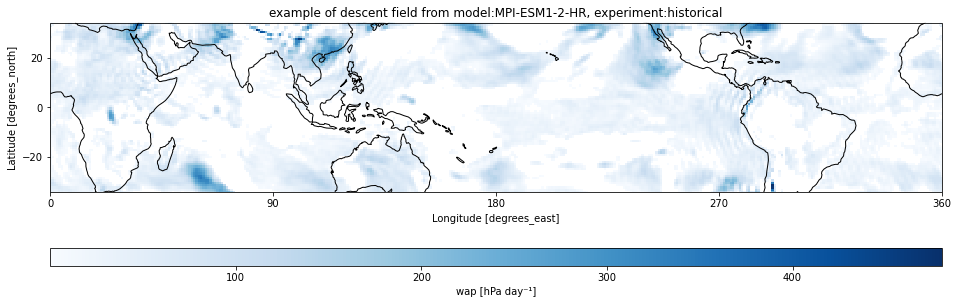

In [10]:
scene = wap500_descent.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('descent', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

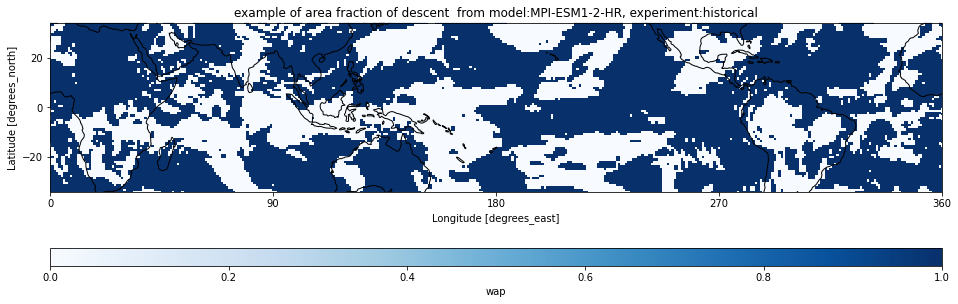

In [11]:
scene = wap500_descent.isel(time=0)>0
title = 'example of {} from model:{}, experiment:{}'.format('area fraction of descent ', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

In [12]:
lat = data.lat.data
lon = data.lon.data
lonm,latm = np.meshgrid(lon,lat)
dlat = (lat[1]-lat[0])
dlon = (lon[1]-lon[0])
R = 6371
aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)

mask = wap500_descent>0
wap500_descent_area = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100

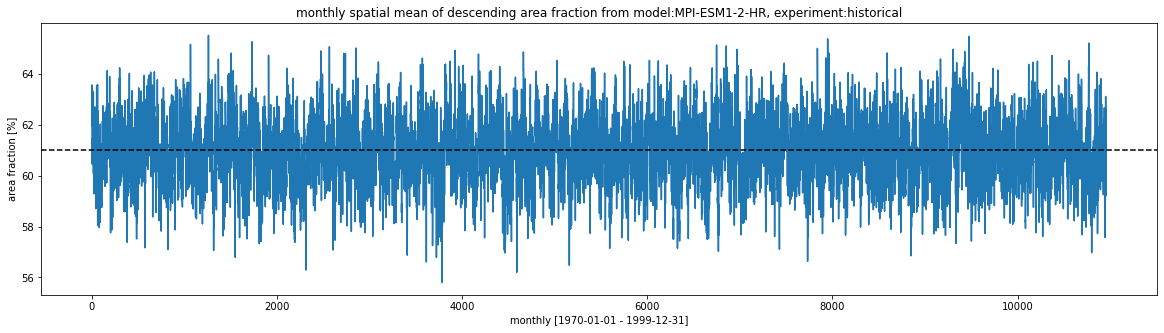

In [14]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

y= wap500_descent_area 
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], 'descending area fraction', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(wap500.isel(time=0).coords['time'].values)[:10], str(wap500.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('area fraction', '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [16]:
variable = 'wap'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # # 'CCSM4',        # 6 no wap data
    # # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # # 'CESM1-BGC'     # 19 no wap data
    ]


models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'abrupt-4xCO2'
    ]

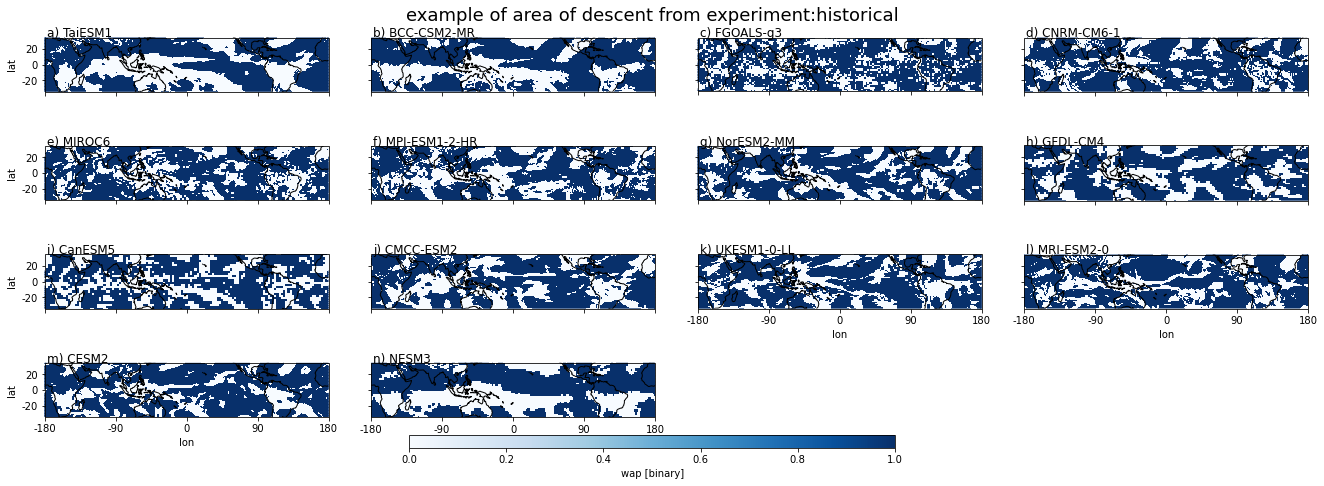

In [18]:
common_limit = False
quantile_low = 0
quantile_high = 0.95
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 5e4)
        y = data.where(data>0)>0
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example of {} from experiment:{}'.format('area of descent', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.75)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(4,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].isel(time=0).sel(plev = 5e4)
    y = data.where(data>0)>0

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, zorder=0, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.825)

cbar_ax = fig.add_axes([0.425, 0.4, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('wap', 'binary'))

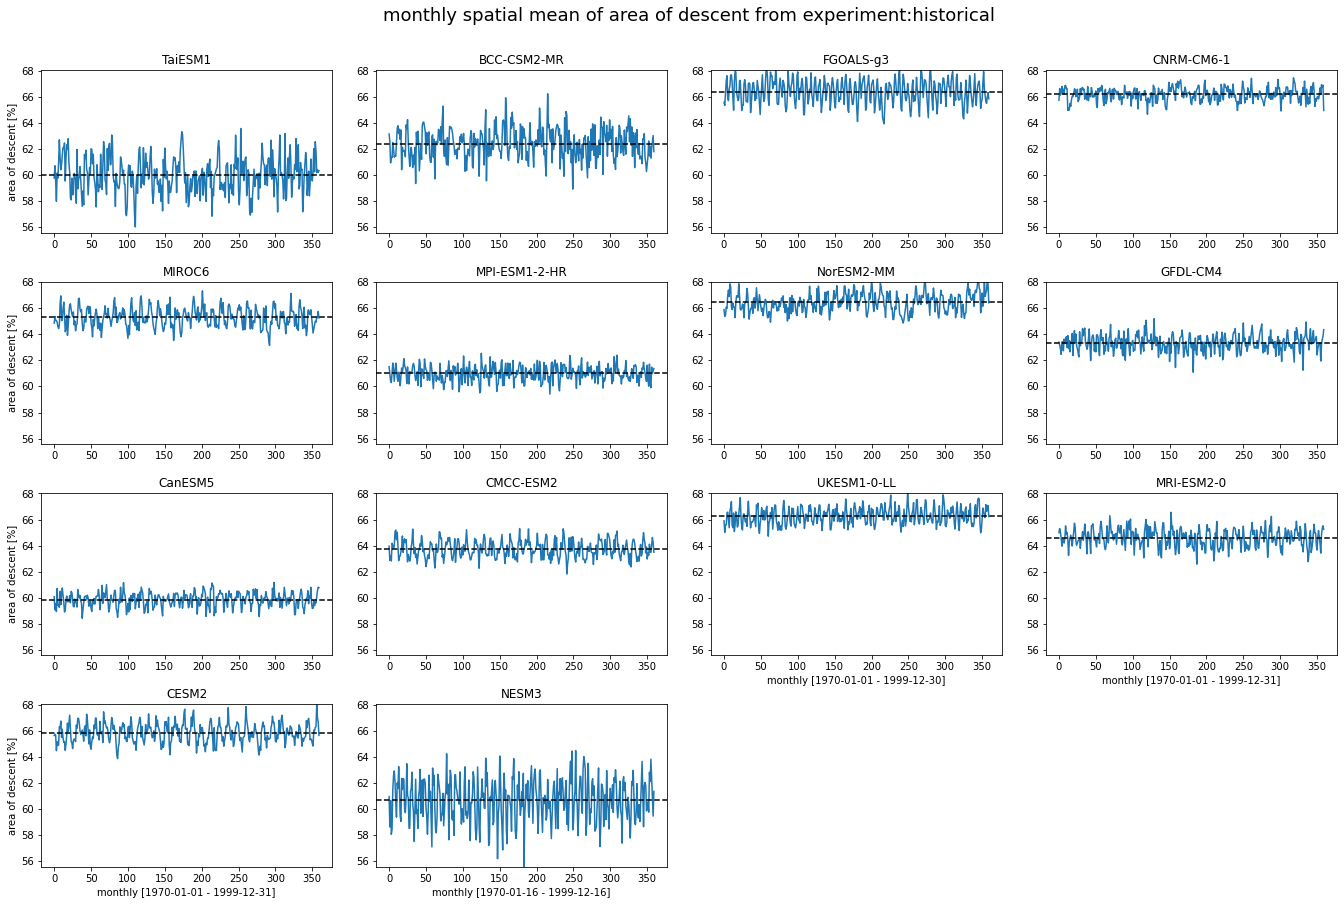

In [19]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

common_limit = True
quantile_low = 0
quantile_high = 0.99
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
        mask = data.where(data>0)>0
        y = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = resample_timeMean(y, timeMean_options[0])

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} from experiment:{}'.format(timeMean_options[0], 'area of descent', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
    mask = data.where(data>0)>0
    y = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    y = resample_timeMean(y, timeMean_options[0])

    title = dataset
    plot_timeseries(y, timeMean_option=timeMean_options[0], title=title, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'area of descent [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'area of descent [%]')

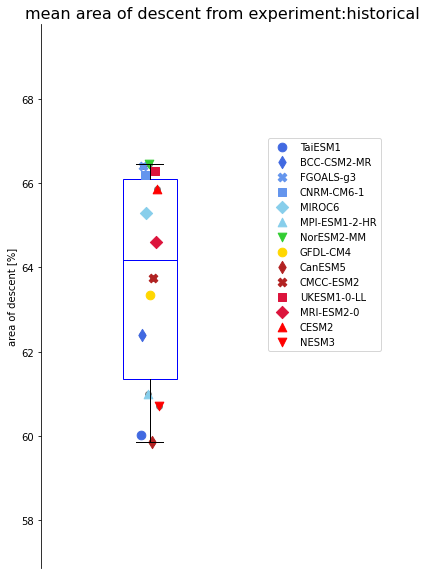

In [26]:
labels_cmip5 =[
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    # 'CNRM-CM5',     # 5
    # # 'CCSM4',        # 6 no wap data
    # # 'HadGEM2-AO',   # 7 no wap data
    # 'BNU-ESM',      # 8
    # # 'EC-EARTH',     # 9 no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # # 'inmcm4',       # 13 no wap data
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # # 'CESM1-BGC'     # 19 no wap data
    ]

labels_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

labels = labels_cmip5 + labels_cmip6

colors = [
    'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', #yellow
    'limegreen', # green
    'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue' # blue
    ]
markers = ['o','d','X','s','D', '^','v']

order_by_tas = False
if order_by_tas:
    order_list = []
    for dataset in datasets:
        data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
        aWeights = np.cos(np.deg2rad(data.lat))
        tas = data.weighted(aWeights).mean(dim=('lat','lon'))
        order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()

common_limit = True
quantile_low = 0
quantile_high = 0.99
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
        mask = data.where(data>0)>0
        y = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        y = y.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean {} from experiment:{}'.format('area of descent', experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['wap'].sel(plev = 5e4)
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
    mask = data.where(data>0)>0
    data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    y_data = data.mean(dim='time')
    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))
x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.95,0.8))


plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('area of descent [{}]'.format('%'))

### Comparing datasets in a warmer climate

In [73]:
models_cmip5 = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    'orig',
    # 'regridded'
    ]

Text(0, 0.5, 'area of descent [%]')

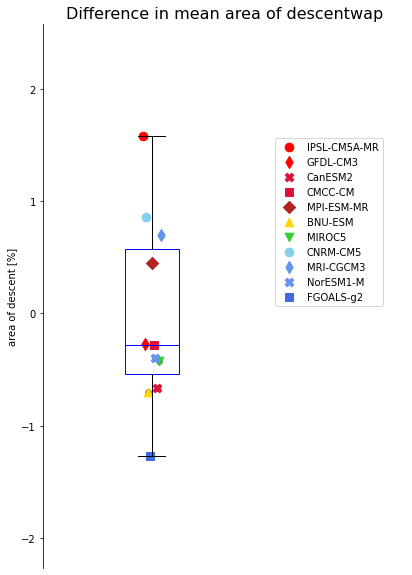

In [74]:
labels_cmip5 =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3 no wap data
    # 'bcc-csm1-1',   # 4 no wao rcp
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 no wap data
    # 'HadGEM2-AO',   # 7 no wap data
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 no wap data
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13 no wap data
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 no wap data
    ]

labels_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

labels = labels_cmip5 + labels_cmip6


colors = [
    'red', 'red', 'crimson', 'crimson', 'firebrick', # red
    'gold', # yellow
    'limegreen', # green
    'skyblue', 'cornflowerblue', 'cornflowerblue','royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tasdiff = False
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:
        tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
        aWeights = np.cos(np.deg2rad(tas_historical.lat))

        tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        tasdiff = tas_rcp - tas_historical
        order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


common_limit = True
quantile_low = 0
quantile_high = 1
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])['wap'].sel(plev = 5e4)
        lat = data.lat.data
        lon = data.lon.data
        lonm,latm = np.meshgrid(lon,lat)
        dlat = (lat[1]-lat[0])
        dlon = (lon[1]-lon[0])
        R = 6371
        aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
        mask = data.where(data>0)>0
        data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        data_historical = data.mean(dim='time')

        data = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])['wap'].sel(plev = 5e4)
        mask = data.where(data>0)>0
        data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
        data_rcp = data.mean(dim='time')

        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        # tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
        # aWeights = np.cos(np.deg2rad(tas_historical.lat))
        # tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        # tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'Difference in mean {}'.format('area of descent' + variable)
plt.xlim(0,1)
plt.ylim(vmin-1, vmax+1)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])['wap'].sel(plev = 5e4)
    lat = data.lat.data
    lon = data.lon.data
    lonm,latm = np.meshgrid(lon,lat)
    dlat = (lat[1]-lat[0])
    dlon = (lon[1]-lon[0])
    R = 6371
    aream = np.cos(np.deg2rad(latm))*np.float64(dlon*dlat*R**2*(np.pi/180)**2)    
    mask = data.where(data>0)>0
    data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_historical = data.mean(dim='time')

    data = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])['wap'].sel(plev = 5e4)
    mask = data.where(data>0)>0
    data = (mask*aream).sum(dim=('lat', 'lon'))/aream.sum()*100
    data_rcp = data.mean(dim='time')

    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
    # aWeights = np.cos(np.deg2rad(tas_historical.lat))
    # tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    # tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))
x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('area of descent [{}]'.format('%')) # '% K'+ chr(0x207B) + chr(0x00B9) 
# plt.ylim([-4,2])